In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
df = pd.read_csv('https://query.data.world/s/ulfoeiyhown53xn4mdumozmyutdky6')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2007791157,INVASIVE VISUAL RECORDING,2609,N,03/20/2007 02:38:00 PM,03/20/2007,1438.0,03/20/2007 02:38:00 PM,03/20/2007,1438.0,...,12.00,N,03/23/2007,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,20181410493,INDECENCY WITH A CHILD/CONTACT,1709,N,05/18/2018 04:00:00 PM,05/18/2018,1600.0,05/21/2018 09:11:00 AM,05/21/2018,911.0,...,24.07,N,09/06/2018,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018 12:28:00 AM,10/27/2018,28.0,...,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014 07:09:00 PM,05/18/2014,1909.0,...,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,...,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2175270,201721579,VIOL OF PROTECTIVE ORDER,3009,N,01/02/2017 09:12:00 PM,01/02/2017,2112.0,01/02/2017 10:17:00 PM,01/02/2017,2217.0,...,23.15,C,01/02/2017,NaN,NaN,3118036.0,3118036.0,30.232558,-97.731967,"(30.23255819, -97.73196698)"
2175271,2013351687,CUSTODY ARREST TRAFFIC WARR,3722,N,02/04/2013 10:45:00 PM,02/04/2013,2245.0,02/04/2013 10:45:00 PM,02/04/2013,2245.0,...,13.05,C,02/11/2013,NaN,NaN,3112339.0,3112339.0,30.251071,-97.749516,"(30.25107106, -97.74951613)"
2175272,20152681539,DISTURBANCE - OTHER,3401,N,09/25/2015 05:49:00 PM,09/25/2015,1749.0,09/25/2015 08:17:00 PM,09/25/2015,2017.0,...,20.05,N,09/29/2015,NaN,NaN,3102372.0,3102372.0,30.240661,-97.781366,"(30.24066148, -97.7813662)"
2175273,2005441710,ASSAULT BY CONTACT,902,N,02/13/2005 07:26:00 PM,02/13/2005,1926.0,02/13/2005 07:26:00 PM,02/13/2005,1926.0,...,21.10,N,11/10/2005,NaN,NaN,3133317.0,3133317.0,30.267650,-97.682603,"(30.26765018, -97.68260306)"
2175274,20102102341,DWI,2100,N,07/29/2010 10:24:00 PM,07/29/2010,2224.0,07/29/2010 10:24:00 PM,07/29/2010,2224.0,...,17.47,C,07/30/2010,NaN,NaN,3086887.0,3086887.0,30.176576,-97.832076,"(30.17657648, -97.83207608)"


In [ ]:
df.shape

(2175275, 27)

In [ ]:
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])

Number of rows 2175275
Number of columns 27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175275 entries, 0 to 2175274
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df3 = df[['Incident Number','Highest Offense Description','Highest Offense Code', 'Family Violence', 'Occurred Date Time','Occurred Date', 'Occurred Time', 'Location Type', 'Address', 'Zip Code']]

In [ ]:
df3.head()

In [ ]:
df3.shape

In [ ]:
df3.isnull().sum()

In [ ]:
df3 = df3.dropna()

In [ ]:
df3.isnull().sum()

Incident Number                0
Highest Offense Description    0
Highest Offense Code           0
Family Violence                0
Occurred Date Time             0
Occurred Date                  0
Occurred Time                  0
Location Type                  0
Address                        0
Zip Code                       0
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141107 entries, 0 to 2175274
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Location Type                object 
 8   Address                      object 
 9   Zip Code                     float64
dtypes: float64(2), int64(2), object(6)
memory usage: 179.7+ MB


In [ ]:
import datetime

In [ ]:
df4 = df3.rename(columns = {'Occurred Date Time': 'Date'})
df4.columns
df4.Date = pd.to_datetime(df4.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
df4.info()

In [ ]:
df4['Highest Offense Description'].value_counts().head(10)

In [ ]:
df4['Location Type'].value_counts().head(10)

In [ ]:
df4.index = pd.DatetimeIndex(df4.Date)

In [ ]:
df4

Text(0, 0.5, 'Number of Crimes')

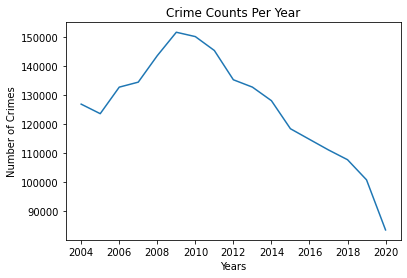

In [ ]:
plt.plot(df4.resample('Y').size())
plt.title("Crime Counts Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [ ]:
plt.plot(df4.resample('M').size())
plt.title("Crime Counts Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

In [ ]:
df_rf = pd.DataFrame(df4.resample('M').size().reset_index())

In [ ]:
df_rf.columns = ['Date', 'Crime_Count']

In [ ]:
df_rf

,Date,Crime_Count
0,2003-01-31,10448
1,2003-02-28,9048
2,2003-03-31,11078
3,2003-04-30,11449
4,2003-05-31,11771
...,...,...
197,2019-06-30,8733
198,2019-07-31,9184
199,2019-08-31,9170
200,2019-09-30,8542


In [ ]:
df_rf = df_rf.rename(columns = {'Date':'ds','Crime_Count':'y'})

In [ ]:
df_rf

,ds,y
0,2003-01-31,10448
1,2003-02-28,9048
2,2003-03-31,11078
3,2003-04-30,11449
4,2003-05-31,11771
...,...,...
197,2019-06-30,8733
198,2019-07-31,9184
199,2019-08-31,9170
200,2019-09-30,8542


In [ ]:
df_rf.shape

(202, 2)

In [ ]:
df_rf = df_rf.reindex(columns=['ds','y'])

In [ ]:
df_rf.head()

,ds,y
0,2003-01-31,10448
1,2003-02-28,9048
2,2003-03-31,11078
3,2003-04-30,11449
4,2003-05-31,11771


In [ ]:
df_rf_train = df_rf.iloc[:150,:]
df_rf_test = df_rf.iloc[150:,:]
print("Shape of new dataframes",df_rf_train.shape,df_rf_test.shape)

Shape of new dataframes (150, 2) (52, 2)


# Making Predictions

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import datetime
import calendar
from datetime import timedelta
import datetime as dt
def add_month(df, forecast_length, forecast_period):
    end_point = len(df)
    df1 = pd.DataFrame(index=range(forecast_length), columns=range(2))
    df1.columns = ['y', 'ds']
    df = df.append(df1)
    df = df.reset_index(drop=True)
    x = df.at[end_point - 1, 'ds']
    x = pd.to_datetime(x, format='%Y-%m-%d')
    days_in_month=calendar.monthrange(x.year, x.month)[1]
    if forecast_period == 'Week':
        for i in range(forecast_length):
            df.at[df.index[end_point + i], 'ds'] = x + timedelta(days=7 + 7 * i)
            df.at[df.index[end_point + i], 'y'] = 0
    elif forecast_period == 'Month':
        for i in range(forecast_length):
            df.at[df.index[end_point + i], 'ds'] = x + timedelta(days=days_in_month + days_in_month * i)
            df.at[df.index[end_point + i], 'y'] = 0
   # df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')
    df['month'] = df['ds'].dt.month
    df = df.drop(['ds'], axis=1)
    return df
def create_lag(df3):
    dataframe = DataFrame()
    for i in range(12, 0, -1):
        dataframe['t-' + str(i)] = df3.y.shift(i)
    df4 = pd.concat([df3, dataframe], axis=1)
    df4.dropna(inplace=True)
    return df4
def randomForest(df1, forecast_length, forecast_period):
    df3 = df1[['y', 'ds']]
    df3 = add_month(df3, forecast_length, forecast_period)
    finaldf = create_lag(df3)
    finaldf = finaldf.reset_index(drop=True)
    n = forecast_length
    end_point = len(finaldf)
    x = end_point - n
    finaldf_train = finaldf.loc[:x - 1, :]
    finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'y']
    finaldf_train_y = finaldf_train['y']
    print("Starting model train..")
    rfr=RandomForestRegressor(n_estimators=100, random_state=1)
    rfe = RFE(estimator=rfr, step=4)
    fit = rfe.fit(finaldf_train_x, finaldf_train_y)
    print("Model train completed..")
    print("Creating forecasted set..")
    yhat = []
    end_point = len(finaldf)
    n = forecast_length
    df3_end = len(df3)
    for i in range(n, 0, -1):
        y = end_point - i
        inputfile = finaldf.loc[y:end_point, :]
        inputfile_x = inputfile.loc[:, inputfile.columns != 'y']
        pred_set = inputfile_x.head(1)
        pred = fit.predict(pred_set)
        df3.at[df3.index[df3_end - i], 'y'] = pred[0]
        finaldf = create_lag(df3)
        finaldf = finaldf.reset_index(drop=True)
        yhat.append(pred)
    yhat = np.array(yhat)
    print("Forecast complete..")
    return yhat
predicted_value=randomForest(df_rf_train, 24, 'Months')

Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..


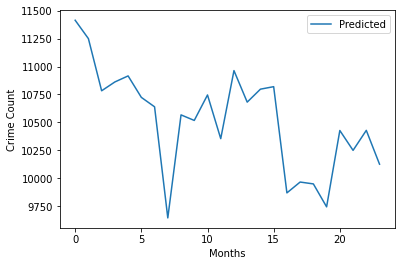

In [ ]:
from matplotlib import pyplot
pyplot.plot(predicted_value, label='Predicted')
pyplot.ylabel("Crime Count")
pyplot.xlabel("Months")
pyplot.legend()
pyplot.show()

# Calculating Accuracy


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import timedelta
df_rf.head()


,ds,y
0,2003-01-31,10448
1,2003-02-28,9048
2,2003-03-31,11078
3,2003-04-30,11449
4,2003-05-31,11771


In [ ]:
dataframe = DataFrame()
for i in range(12, 0, -1):
   dataframe['t-' + str(i)] = df_rf.y.shift(i)
final_data = pd.concat([df_rf, dataframe], axis=1)
final_data.dropna(inplace=True)

In [ ]:
final_data['ds'] = pd.to_datetime(final_data['ds'], format='%Y-%m-%d')
final_data['month'] = final_data['ds'].dt.month

In [ ]:
finaldf = final_data.drop(['ds'], axis=1)
finaldf = finaldf.reset_index(drop=True)
test_length=170
end_point = len(finaldf)
x = end_point - test_length
finaldf_train = finaldf.loc[:x - 1, :]
finaldf_test = finaldf.loc[x:, :]
finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'y']
finaldf_test_y = finaldf_test['y']
finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'y']
finaldf_train_y = finaldf_train['y']
print("Starting model train..")
rfr=RandomForestRegressor(n_estimators=100, random_state=1)
rfe = RFE(estimator=rfr, step=4)
fit = rfe.fit(finaldf_train_x, finaldf_train_y)
y_pred = fit.predict(finaldf_test_x)

Starting model train..


In [ ]:
y_true = np.array(finaldf_test_y)
sumvalue=np.sum(y_true)
mape=np.sum(np.abs((y_true - y_pred)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 91.31 %.


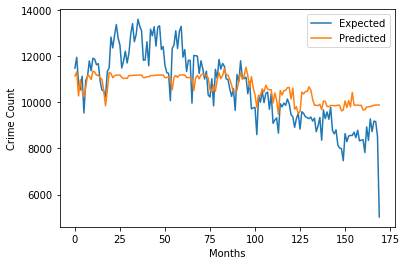

In [ ]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Expected')
pyplot.plot(y_pred, label='Predicted')
pyplot.ylabel("Crime Count")
pyplot.xlabel("Months")
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

Mean Absolute Error: 921.8332352941176
Mean Squared Error: 1284279.0064864706
Root Mean Squared Error: 1133.260343648568


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true,y_pred)
print(r2)

0.4797517007897627
